In [137]:
import sys
sys.path.append('../')
import helper

import numpy as np

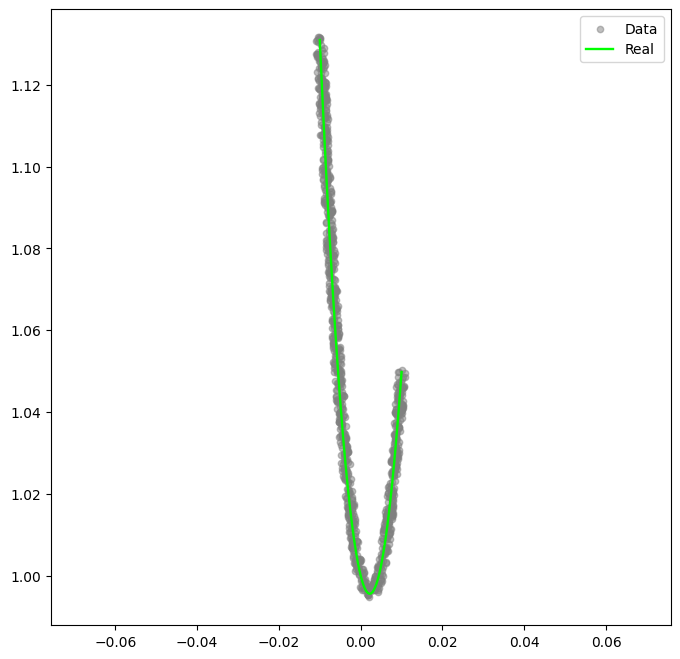

In [138]:
dataset_name = '1'
dataset_params = helper.get_params_dataset(dataset_name)
dataset_filename = helper.get_filenames_datasets()[dataset_name]
f = helper.get_func_research(dataset_params['f_label'])

X, Y, datasets = helper.load_datasets(dataset_filename)

helper.print_generated(X, Y, datasets[0])

real_w = np.array([dataset_params["w0"], dataset_params["w1"]], dtype=float)

In [139]:
import torch
import torch.optim as optim
import numpy as np

# Определяем функцию потерь
def mse_loss_numpy(dataset_X, dataset_Y, w, f):
    y_pred = f(dataset_X, w)
    mse = np.mean((dataset_Y - y_pred) ** 2)
    return mse

def mse_loss_tourch(dataset_X, dataset_Y, w, f):
    y_pred = f(dataset_X, w)
    mse = torch.mean((dataset_Y - y_pred) ** 2)
    return mse

x_train, y_train = torch.from_numpy(datasets[0][:, :-1]), torch.from_numpy(datasets[0][:, -1:])

eps_minimum = mse_loss_tourch(x_train, y_train, torch.from_numpy(real_w), f)
eps_minimum = eps_minimum*1.1

def train(f, x_train, y_train, eps_minimum, loss_function, optimizer_method, num_epochs=1000, lr=0.01, apply_min=True):
    # Определяем модель и исходные значения w
    w = torch.tensor([-1.0, 0.1], requires_grad=True)

    optimizer = optimizer_method([w], lr=lr)

    points = []
    points.append(w.detach().numpy())
    # Цикл оптимизации
    for epoch in range(num_epochs):
        optimizer.zero_grad()  # Обнуляем градиенты

        # # Прямой проход
        # y_pred = f(x_train, w)

        # Вычисляем функцию потерь
        loss = loss_function(x_train, y_train, w, f)
        
        if apply_min and mse_loss_tourch(x_train, y_train, w, f) < eps_minimum:
            break

        # Обратное распространение
        loss.backward()

        # Обновляем параметры w
        optimizer.step()

        # # Выводим прогресс оптимизации
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
        points.append(w.detach().numpy())

    # Получаем обученные значения w
    # trained_w = w.detach().numpy()
    return points

Обученные значения w: [1.8094866 2.986867 ] steps: 510


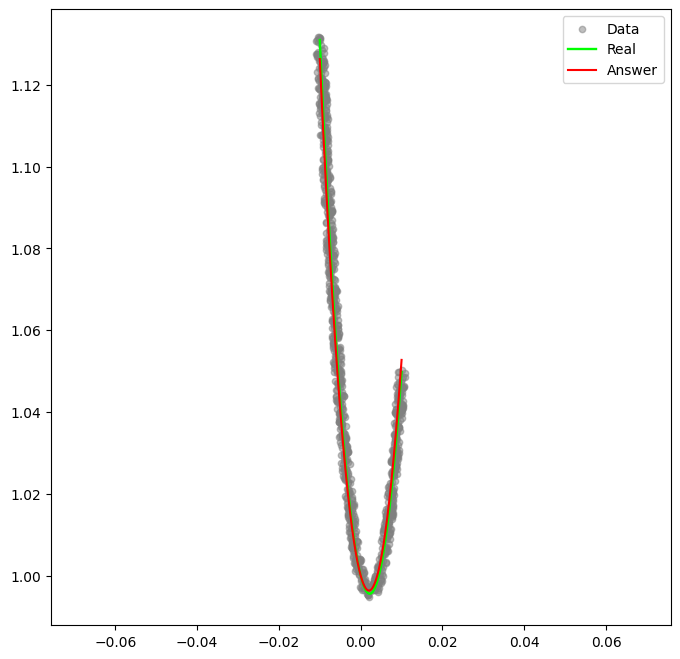

In [140]:
points = train(f, x_train, y_train, eps_minimum, mse_loss_tourch, optim.SGD, lr=10)
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]))

Обученные значения w: [1.8097469 2.9912508] steps: 569


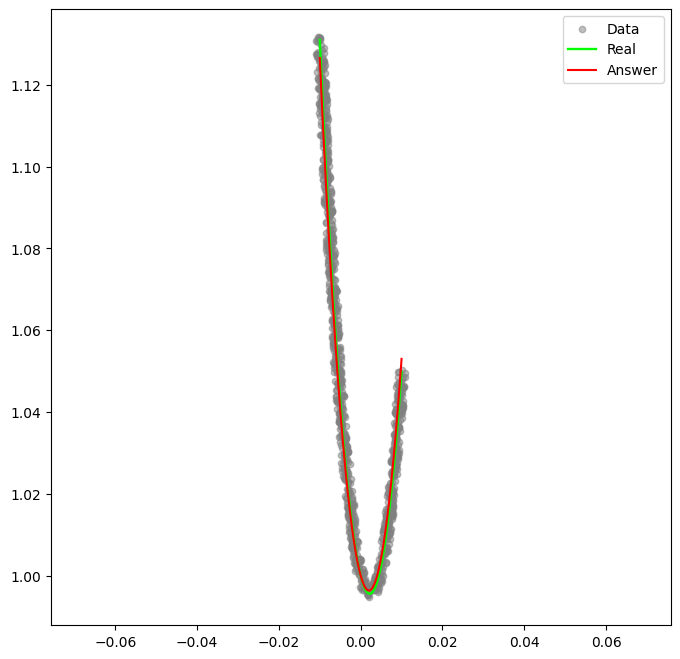

In [141]:
points = train(f, x_train, y_train, eps_minimum, mse_loss_tourch, optim.Adam)
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]))

Обученные значения w: [1.8115644 2.9918792] steps: 327


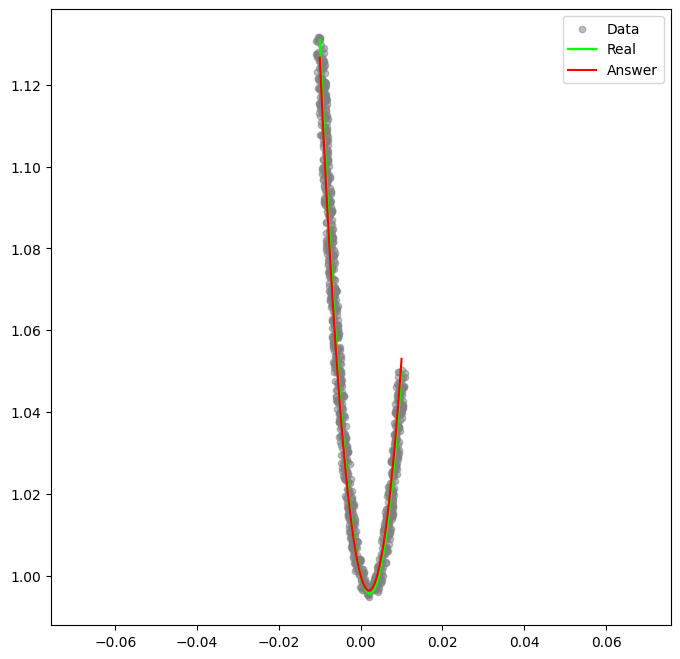

In [142]:
points = train(f, x_train, y_train, eps_minimum, mse_loss_tourch, optim.RMSprop)
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]))

Обученные значения w: [1.8094866 2.986867 ] steps: 510


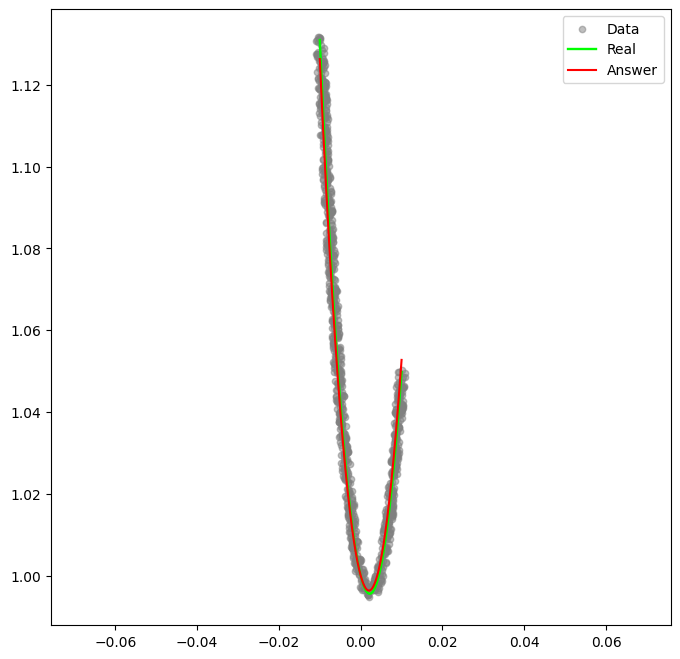

In [143]:
class CustomOptimizer:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def step(self):
        for param in self.params:
            if param.grad is not None:
                param.data -= param.grad * self.lr

points = train(f, x_train, y_train, eps_minimum, mse_loss_tourch, CustomOptimizer, lr=10)
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]))